<a href="https://colab.research.google.com/github/oailnivek/ML100-Days/blob/master/homework/Day-071_%E4%BD%BF%E7%94%A8%E6%90%8D%E5%A4%B1%E5%87%BD%E6%95%B8_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train), (x_img_test,y_label_test) = cifar10.load_data()

170500096/170498071 [==============================] - 26s 0us/step


In [3]:
#確認 CIFAR10 Dataset 資料維度
print('[train data]\nimages: {}\nlabels: {}\n'.format(x_img_train.shape, y_label_train.shape))
print('[test data]\nimages: {}\nlabels: {}'.format(x_img_test.shape, y_label_test.shape))

[train data]
images: (50000, 32, 32, 3)
labels: (50000, 1)

[test data]
images: (10000, 32, 32, 3)
labels: (10000, 1)


In [0]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils

y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [69]:
def create_model():
    model = Sequential()

    #卷積層1
    model.add(Conv2D(filters=32,kernel_size=(3,3),
                     input_shape=(32, 32,3), 
                     activation='relu', 
                     padding='same'))
    model.add(Dropout(rate=0.25))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    #卷積層2與池化層2
    model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                     activation='relu', padding='same'))
    model.add(Dropout(0.25))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    #建立神經網路(平坦層、隱藏層、輸出層)
    model.add(Flatten())
    model.add(Dropout(rate=0.25))

    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(rate=0.25))

    model.add(Dense(10, activation='softmax'))
    
    return model

#檢查model 的STACK
print(create_model().summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [70]:
try:
    create_model().load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

# 作業: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate

In [0]:
def train(loss):
    model = create_model()
    
    model.compile(
        loss=loss,
        optimizer='sgd',
        metrics=['accuracy']
    )
    
    train_history = model.fit(
        x_img_train_normalize,
        y_label_train_OneHot,
        validation_split=0.2,
        epochs=10,
        batch_size=16,
        verbose=1
    )
    
    return train_history, model

In [0]:
import matplotlib.pyplot as plt


def plot_history(train_history):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    histories = [
        ('Accuracy', ('acc', 'val_acc')),
        ('Loss', ('loss', 'val_loss')),
    ]
    
    for ax, history in zip(axes.ravel(), histories):
        label, fields = history
        ax.plot(train_history.history[fields[0]])
        ax.plot(train_history.history[fields[1]])
        
        ax.set_title('Train History')
        ax.set_ylabel(label)
        ax.set_xlabel('Epoch')
        ax.legend(['train', 'test'], loc='upper left')
        
    plt.show()

In [73]:
train_histories = [
    ('Cross Entropy', train('categorical_crossentropy')),
    ('Cross Entropy (Binary)', train('binary_crossentropy')),
    ('Mean Squared Error', train('mean_squared_error'))
]

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 25s 617us/step - loss: 1.8081 - acc: 0.3491 - val_loss: 1.6118 - val_acc: 0.4602
Epoch 2/10
40000/40000 [==============================] - 24s 590us/step - loss: 1.4652 - acc: 0.4737 - val_loss: 1.4233 - val_acc: 0.5371
Epoch 3/10
40000/40000 [==============================] - 24s 590us/step - loss: 1.3102 - acc: 0.5278 - val_loss: 1.3573 - val_acc: 0.5526
Epoch 4/10
40000/40000 [==============================] - 24s 588us/step - loss: 1.2051 - acc: 0.5728 - val_loss: 1.2486 - val_acc: 0.5714
Epoch 5/10
40000/40000 [==============================] - 24s 588us/step - loss: 1.1246 - acc: 0.6016 - val_loss: 1.1641 - val_acc: 0.6095
Epoch 6/10
40000/40000 [==============================] - 24s 589us/step - loss: 1.0492 - acc: 0.6267 - val_loss: 1.1090 - val_acc: 0.6382
Epoch 7/10
40000/40000 [==============================] - 24s 592us/step - loss: 0.9882 - acc: 0.6513 - val_loss: 1.

Cross Entropy


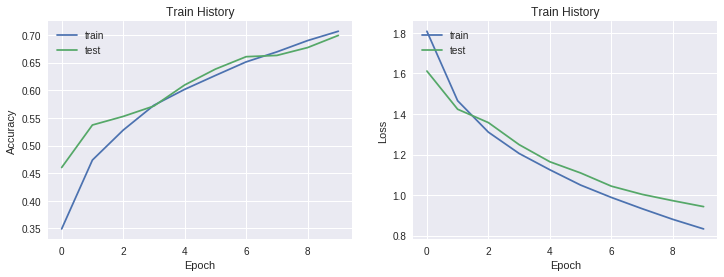

Cross Entropy (Binary)


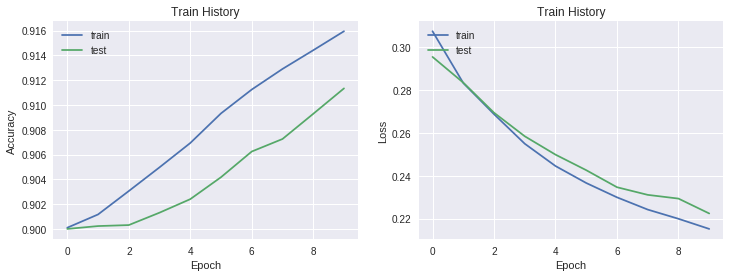

Mean Squared Error


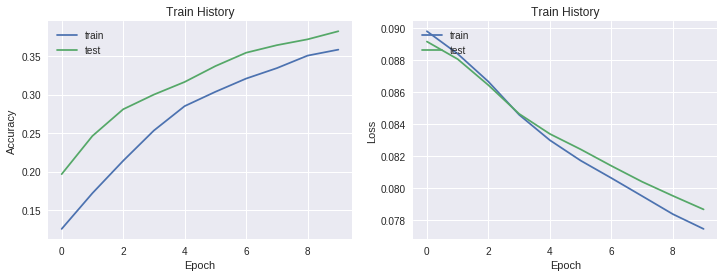

In [74]:
for title, history in train_histories:
    print(title)
    plot_history(history[0])